In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Customers.txt')

In [3]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Firstly, I have dropped unnecessary columns

In [6]:
df.drop(['Email','Address','Avatar'],axis=1, inplace=True)

<AxesSubplot:xlabel='Avg. Session Length'>

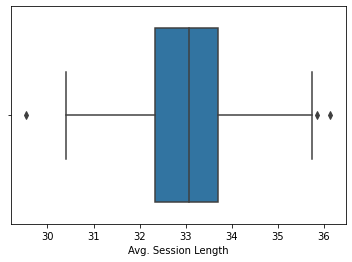

In [7]:
sns.boxplot(df['Avg. Session Length'])

In [8]:
print(np.where(df['Avg. Session Length']<30))

(array([12], dtype=int64),)


In [9]:

# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df['Avg. Session Length']))
print(z)

0      1.456351
1      1.136502
2      0.052723
3      1.263010
4      0.279838
         ...   
495    0.186035
496    1.663357
497    0.409872
498    0.271597
499    0.668422
Name: Avg. Session Length, Length: 500, dtype: float64


In [10]:
# Position of the outlier
print(np.where(z > 3))

(array([ 12, 154], dtype=int64),)


In [11]:
''' Detection '''
# IQR
Q1 = np.percentile(df['Avg. Session Length'], 25,interpolation = 'midpoint')

Q3 = np.percentile(df['Avg. Session Length'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Avg. Session Length'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Avg. Session Length'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)


Old Shape:  (500, 5)
New Shape:  (497, 5)


In [12]:
Q1 = np.percentile(df['Time on App'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Time on App'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
upper = np.where(df['Time on App'] >= (Q3+1.5*IQR))
lower = np.where(df['Time on App'] <= (Q1-1.5*IQR))
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (497, 5)
New Shape:  (493, 5)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   493 non-null    float64
 1   Time on App           493 non-null    float64
 2   Time on Website       493 non-null    float64
 3   Length of Membership  493 non-null    float64
 4   Yearly Amount Spent   493 non-null    float64
dtypes: float64(5)
memory usage: 23.1 KB


So, I have cleaned outliers from data for obtaining good results.

In [22]:
cols = ['Time on App', 'Avg. Session Length','Time on Website','Length of Membership','Yearly Amount Spent']
df[cols] = df[cols].round(0)

In [25]:
df=df[cols].astype(int)

In [54]:
df.groupby('Time on App')['Avg. Session Length'].mean()


Time on App
8     34.000000
9     34.000000
10    33.000000
11    33.076923
12    33.082524
13    32.940678
14    33.142857
15    33.000000
Name: Avg. Session Length, dtype: float64

In [38]:
df['Time on App'].mean()

12.060851926977687

In [49]:
df['Time on Website'].mean()
#So time on app is lower than time on website

37.0709939148073

In [44]:
new_df=df.sort_values(by='Length of Membership',ascending=False).head(15)
new_df

,Time on App,Avg. Session Length,Time on Website,Length of Membership,Yearly Amount Spent
157,12,35,34,7,744
273,12,34,37,6,641
298,11,34,36,6,588
368,13,34,36,6,709
24,13,34,38,6,701
151,12,33,37,6,684
292,11,33,36,6,584
396,11,36,36,6,670
114,13,33,36,6,642
5,12,34,34,6,637


In [46]:
new_df['Time on Website'].mean()

36.266666666666666

In [47]:
new_df['Time on App'].mean()

12.333333333333334

So, we see that Length of membership for Time on website is high than time on app

In [50]:
new_df2=df.sort_values(by='Yearly Amount Spent',ascending=True).head(15)
new_df2

,Time on App,Avg. Session Length,Time on Website,Length of Membership,Yearly Amount Spent
225,10,33,36,1,257
303,12,31,37,1,266
415,11,32,39,1,276
299,12,30,36,2,282
173,12,32,37,1,299
309,8,34,36,2,302
434,11,34,36,1,304
442,9,34,36,2,308
447,13,33,38,0,314
312,12,30,36,2,320


In [51]:
new_df2['Time on Website'].mean()

37.0

In [52]:
new_df2['Time on App'].mean()

11.133333333333333

Also, when the amount of money spent yearly has descreased Time on Website was increased. So Website should be first priority for company.